GeoJson Data Approach

In [1]:
import osmnx as ox
import geojson
import pandas as pd

def get_place_postal_code_polygons(place_name):
    # Get postal code polygons for the specified place using OSMnx
    postal_code_polygons = ox.features_from_place(place_name, tags={"boundary": "postal_code"})

    # Convert the GeoDataFrame to a Pandas DataFrame
    df = pd.DataFrame(postal_code_polygons)

    # Drop rows with NaN values in the 'postal_code' or 'geometry' columns
    df = df.dropna(subset=['postal_code', 'geometry'])

    # Dictionary to store postal code areas and their polygons
    postal_code_polygon_dict = {}

    # Iterate over the features in the cleaned DataFrame
    for idx, feature in df.iterrows():
        # Extract postal code and polygon
        postal_code = feature['postal_code']
        postal_code_polygon = feature['geometry']

        # Add the postal code and polygon to the dictionary
        postal_code_polygon_dict[postal_code] = postal_code_polygon

    return postal_code_polygon_dict

# Example call for Kassel
# kassel_postal_code_polygons = get_place_postal_code_polygons("Kassel")

ger_postal_code_polygons = get_place_postal_code_polygons("Germany")

# Print the resulting dictionary for testing purposes
# print("Kassel Postal Code Polygons:", kassel_postal_code_polygons)

print("Germany Postal Code Polygons:", ger_postal_code_polygons)

# Function to format data into GeoJSON
def format_geojson_data(data):
    geojson_features = []
    for postal_code, polygon in data.items():
        feature = geojson.Feature(geometry=polygon, properties={"postal_code": postal_code})
        geojson_features.append(feature)

    geojson_feature_collection = geojson.FeatureCollection(geojson_features)
    return geojson_feature_collection

# Convert Kassel postal code data to GeoJSON format
#kassel_geojson_data = format_geojson_data(kassel_postal_code_polygons)

ger_geojson_data = format_geojson_data(ger_postal_code_polygons)

# Print the resulting GeoJSON data for testing purposes
# print("Kassel GeoJSON Data:")
# print(geojson.dumps(kassel_geojson_data, indent=2))

# Print the resulting GeoJSON data for testing purposes
#print("Germany GeoJSON Data:")
#print(geojson.dumps(ger_geojson_data, indent=2))

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\osmnx\_overpass.py:211: UserWarning: This area is 183 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Germany Postal Code Polygons: 

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


{'87437': <POLYGON ((10.301 47.767, 10.301 47.768, 10.301 47.767, 10.302 47.767, 10.30...>, '87439': <POLYGON ((10.237 47.77, 10.237 47.771, 10.237 47.771, 10.238 47.771, 10.238...>, '87435': <POLYGON ((10.274 47.708, 10.274 47.708, 10.275 47.708, 10.275 47.708, 10.27...>, '87488': <POLYGON ((10.373 47.714, 10.373 47.714, 10.373 47.714, 10.374 47.714, 10.37...>, '87527': <POLYGON ((10.195 47.479, 10.195 47.479, 10.196 47.479, 10.196 47.48, 10.196...>, '87538': <POLYGON ((10.057 47.466, 10.058 47.466, 10.058 47.466, 10.058 47.466, 10.05...>, '87616': <POLYGON ((10.526 47.678, 10.526 47.679, 10.526 47.679, 10.526 47.679, 10.52...>, '87637': <POLYGON ((10.545 47.644, 10.545 47.644, 10.545 47.644, 10.545 47.645, 10.54...>, '87675': <POLYGON ((10.662 47.695, 10.662 47.695, 10.662 47.695, 10.662 47.695, 10.66...>, '88167': <POLYGON ((9.921 47.613, 9.92 47.614, 9.92 47.614, 9.92 47.615, 9.92 47.615,...>, '88316': <POLYGON ((9.985 47.752, 9.985 47.752, 9.986 47.753, 9.986 47.753, 9.987 47....>

GeoJson Data File Kassel


In [3]:
# import json

# # Function to save GeoJSON data to a file
# def save_geojson_to_file(geojson_data, file_path):
#     with open(file_path, 'w') as file:
#         json.dump(geojson_data, file, indent=2)

# # Save Kassel GeoJSON data to a file
# kassel_geojson_file_path = 'kassel_geojson_data.geojson'
# save_geojson_to_file(kassel_geojson_data, kassel_geojson_file_path)

# print(f"Kassel GeoJSON data saved to {kassel_geojson_file_path}")


Kassel GeoJSON data saved to kassel_geojson_data.geojson


GeoJson Data File Germany

In [2]:
import json

# Function to save GeoJSON data to a file
def save_geojson_to_file(geojson_data, file_path):
    with open(file_path, 'w') as file:
        json.dump(geojson_data, file, indent=2)

# Save Germany GeoJSON data to a file
ger_geojson_file_path = 'germany_geojson_data.geojson'
save_geojson_to_file(ger_geojson_data, ger_geojson_file_path)

print(f"Germany GeoJSON data saved to {ger_geojson_file_path}")

Germany GeoJSON data saved to germany_geojson_data.geojson


Visualization Data

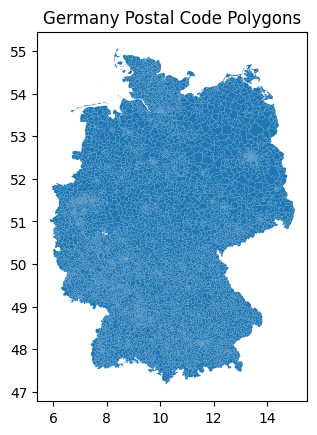

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON data using geopandas
ger_gdf = gpd.read_file(ger_geojson_file_path)

# Plot the GeoDataFrame
ger_gdf.plot()
plt.title('Germany Postal Code Polygons')
plt.show()
